In [1]:
from sklearn.svm import SVC
import sklearn.neural_network as nn
import sklearn.model_selection
import sklearn.metrics as metrics
import numpy as np
import sklearn.neighbors as neighbors
import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784') 

KNN : scoretest=0.942
KNN : scoretrain=0.9642857142857143
KNN : Recall=0.9398556699516535
[[157   0   0   0   0   0   0   0   0   0]
 [  0 179   0   0   0   0   0   0   0   0]
 [  5   5 145   0   1   0   2   1   1   0]
 [  0   0   1 136   0   6   0   3   1   0]
 [  0   4   0   0 132   0   1   0   0   8]
 [  0   0   0   2   1 113   3   0   1   0]
 [  1   2   0   0   0   2 157   0   0   0]
 [  0   5   1   0   0   0   0 154   0   2]
 [  2   2   3   6   1   1   1   1 134   1]
 [  0   0   0   1   5   0   0   4   0 106]]
ANN : scoretest=0.9126666666666666
ANN : scoretrain=0.9911428571428571
ANN : Recall=0.9091903993879586
[[146   0   0   0   0  11   0   0   0   0]
 [  0 174   3   0   0   0   0   0   1   1]
 [  2   3 150   0   2   0   3   0   0   0]
 [  0   0   7 124   0   2   0   4   9   1]
 [  0   1   1   0 125   1   7   0   1   9]
 [  1   0   1   2   2 107   2   0   5   0]
 [  1   2   1   0   2   3 153   0   0   0]
 [  1   4   2   0   0   1   0 151   3   0]
 [  0   5   4   0   1   1   1   

Text(0, 0.5, 'Precision')

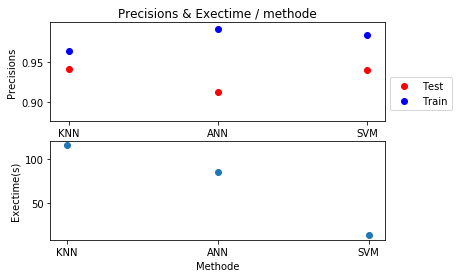

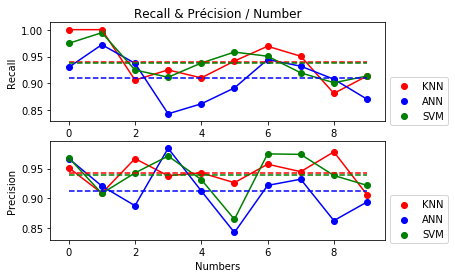

In [5]:
# Comparaison sur 5000 données dont 70% d'entrainement

trainsize=0.7
size=5000
data=np.random.randint(70000, size=size)
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
train_size=trainsize)

scoreTest=[]
scoreTrain=[]
times=[]
Rec=[]
# KNN
start=time.time()
clfK = neighbors.KNeighborsClassifier(3,n_jobs=-1,p=3)
clfK.fit(xtrain, ytrain)
tempscore=clfK.score(xtest,ytest)
scoreTest.append(tempscore)
print("KNN : scoretest="+str(tempscore))
tempscore=clfK.score(xtrain,ytrain)
scoreTrain.append(tempscore)
print("KNN : scoretrain="+str(tempscore))
temprec=metrics.recall_score(ytest,clfK.predict(xtest),average='macro')
Rec.append(temprec)
print("KNN : Recall="+str(temprec))
length=time.time()-start
times.append(length)
print(metrics.confusion_matrix(ytest,clfK.predict(xtest)))
# ANN
start=time.time()
clfA = nn.MLPClassifier(hidden_layer_sizes=(50,)*20,solver='adam',alpha=0.3)
clfA.fit(xtrain, ytrain)
tempscore=clfA.score(xtest,ytest)
scoreTest.append(tempscore)
print("ANN : scoretest="+str(tempscore))
tempscore=clfA.score(xtrain,ytrain)
scoreTrain.append(tempscore)
print("ANN : scoretrain="+str(tempscore))
temprec=metrics.recall_score(ytest,clfA.predict(xtest),average='macro')
Rec.append(temprec)
print("ANN : Recall="+str(temprec))
length=time.time()-start
times.append(length)
print(metrics.confusion_matrix(ytest,clfA.predict(xtest)))
# SVM
start=time.time()
clfS = SVC(kernel='poly',gamma='scale',C=1)
clfS.fit(xtrain, ytrain)
tempscore=clfS.score(xtest,ytest)
scoreTest.append(tempscore)
print("SVM : scoretest="+str(tempscore))
tempscore=clfS.score(xtrain,ytrain)
scoreTrain.append(tempscore)
print("SVM : scoretrain="+str(tempscore))

temprec=metrics.recall_score(ytest,clfS.predict(xtest),average='macro')
Rec.append(temprec)
print("SVM : Recall="+str(temprec))
length=time.time()-start
times.append(length)
print(metrics.confusion_matrix(ytest,clfS.predict(xtest)))

temprec=metrics.recall_score(ytest,clfA.predict(xtest),average='macro')
recallK=metrics.recall_score(ytest,clfK.predict(xtest),average=None)
recallA=metrics.recall_score(ytest,clfA.predict(xtest),average=None)
recallS=metrics.recall_score(ytest,clfS.predict(xtest),average=None)

precisionK=metrics.precision_score(ytest,clfK.predict(xtest),average=None)
precisionA=metrics.precision_score(ytest,clfA.predict(xtest),average=None)
precisionS=metrics.precision_score(ytest,clfS.predict(xtest),average=None)

moyrecallK=0
moyrecallA=0
moyrecallS=0
moyprecK=0
moyprecA=0
moyprecS=0

for i in range(0,10):
    moyrecallK=moyrecallK+recallK[i]
    moyrecallA=moyrecallA+recallA[i]
    moyrecallS=moyrecallS+recallS[i]
    moyprecK=moyprecK+precisionK[i]
    moyprecA=moyprecA+precisionA[i]
    moyprecS=moyprecS+precisionS[i]
moyrecallK=moyrecallK/10
moyrecallA=moyrecallA/10
moyrecallS=moyrecallS/10
moyprecK=moyprecK/10
moyprecA=moyprecA/10
moyprecS=moyprecS/10
    
fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.scatter(('KNN','ANN','SVM'),scoreTest,c='r',label='Test')
ax1.set_title("Precisions & Exectime / methode")
ax1.set_ylabel("Precisions")
ax1.scatter(('KNN','ANN','SVM'),scoreTrain,c='b',label='Train')
ax1.legend(loc='upper left',bbox_to_anchor=(1,0.5))

ax2.scatter(('KNN','ANN','SVM'),times)
ax2.set_xlabel("Methode")
ax2.set_ylabel("Exectime(s)")

fig2, (ax3, ax4) = plt.subplots(nrows=2, ncols=1)
ax3.plot(range(0,10),recallK,c='r')
ax3.plot(range(0,10),recallA,c='b')
ax3.plot(range(0,10),recallS,c='g')
ax3.plot(range(0,10),(moyrecallK,)*10,c='r',linestyle='dashed')
ax3.plot(range(0,10),(moyrecallA,)*10,c='b',linestyle='dashed')
ax3.plot(range(0,10),(moyrecallS,)*10,c='g',linestyle='dashed')
ax3.scatter(range(0,10),recallK,c='r',label="KNN")
ax3.scatter(range(0,10),recallA,c='b',label="ANN")
ax3.scatter(range(0,10),recallS,c='g',label="SVM")
ax3.legend(loc='upper left',bbox_to_anchor=(1,0.5))
ax3.set_title("Recall & Précision / Number")
ax3.set_ylabel("Recall")

ax4.plot(range(0,10),precisionK,c='r')
ax4.plot(range(0,10),precisionA,c='b')
ax4.plot(range(0,10),precisionS,c='g')
ax4.plot(range(0,10),(moyprecK,)*10,c='r',linestyle='dashed')
ax4.plot(range(0,10),(moyprecA,)*10,c='b',linestyle='dashed')
ax4.plot(range(0,10),(moyprecS,)*10,c='g',linestyle='dashed')
ax4.scatter(range(0,10),precisionK,c='r',label="KNN")
ax4.scatter(range(0,10),precisionA,c='b',label="ANN")
ax4.scatter(range(0,10),precisionS,c='g',label="SVM")
ax4.legend(loc='upper left',bbox_to_anchor=(1,0.5))
ax4.set_xlabel("Numbers")
ax4.set_ylabel("Precision")

KNN : scoretest=0.941
KNN : scoretrain=0.9741428571428571
KNN : Recall=0.9386675962572164
[[291   0   1   0   1   0   2   0   0   0]
 [  0 378   2   0   0   0   0   0   0   1]
 [  3   3 266   1   1   0   0   5   0   2]
 [  0   2   5 291   0   5   0   2   1   0]
 [  3   4   1   0 269   0   1   0   0  12]
 [  4   4   0   8   1 238   3   0   4   5]
 [  4   0   0   0   0   2 281   0   0   0]
 [  0   3   0   0   7   1   0 308   0   7]
 [  2   5   0  10   5   5   0   2 263   7]
 [  4   4   0   6   8   1   1   5   1 238]]
ANN : scoretest=0.9336666666666666
ANN : scoretrain=0.9931428571428571
ANN : Recall=0.93150515697135
[[284   0   0   1   0   1   3   1   2   3]
 [  0 372   3   0   2   1   0   3   0   0]
 [  1   2 251   8   2   2   1  11   1   2]
 [  0   0   2 291   0   7   0   1   5   0]
 [  3   3   1   0 277   1   1   0   1   3]
 [  3   1   0   9   1 245   7   0   1   0]
 [  9   3   2   0   6   6 259   0   2   0]
 [  2   1   0   3   3   1   0 310   0   6]
 [  2   1   2  11   2   4   1   0 

Text(0, 0.5, 'Precision')

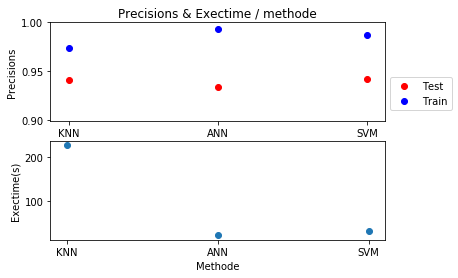

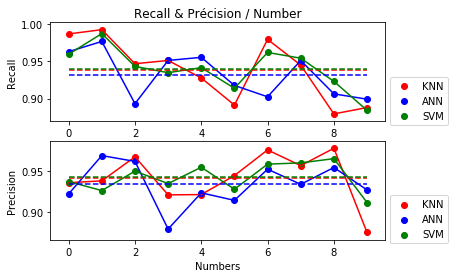

In [6]:
# Comparaison sur 10 000 données dont 70% d'entrainement

trainsize=0.7
size=10000
data=np.random.randint(70000, size=size)
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
train_size=trainsize)

scoreTest=[]
scoreTrain=[]
times=[]
Rec=[]
# KNN
start=time.time()
clfK = neighbors.KNeighborsClassifier(3,n_jobs=-1,p=3)
clfK.fit(xtrain, ytrain)
tempscore=clfK.score(xtest,ytest)
scoreTest.append(tempscore)
print("KNN : scoretest="+str(tempscore))
tempscore=clfK.score(xtrain,ytrain)
scoreTrain.append(tempscore)
print("KNN : scoretrain="+str(tempscore))
temprec=metrics.recall_score(ytest,clfK.predict(xtest),average='macro')
Rec.append(temprec)
print("KNN : Recall="+str(temprec))
length=time.time()-start
times.append(length)
print(metrics.confusion_matrix(ytest,clfK.predict(xtest)))
# ANN
start=time.time()
clfA = nn.MLPClassifier(hidden_layer_sizes=(50,)*20,solver='adam',alpha=0.3)
clfA.fit(xtrain, ytrain)
tempscore=clfA.score(xtest,ytest)
scoreTest.append(tempscore)
print("ANN : scoretest="+str(tempscore))
tempscore=clfA.score(xtrain,ytrain)
scoreTrain.append(tempscore)
print("ANN : scoretrain="+str(tempscore))
temprec=metrics.recall_score(ytest,clfA.predict(xtest),average='macro')
Rec.append(temprec)
print("ANN : Recall="+str(temprec))
length=time.time()-start
times.append(length)
print(metrics.confusion_matrix(ytest,clfA.predict(xtest)))
# SVM
start=time.time()
clfS = SVC(kernel='poly',gamma='scale',C=1)
clfS.fit(xtrain, ytrain)
tempscore=clfS.score(xtest,ytest)
scoreTest.append(tempscore)
print("SVM : scoretest="+str(tempscore))
tempscore=clfS.score(xtrain,ytrain)
scoreTrain.append(tempscore)
print("SVM : scoretrain="+str(tempscore))

temprec=metrics.recall_score(ytest,clfS.predict(xtest),average='macro')
Rec.append(temprec)
print("SVM : Recall="+str(temprec))
length=time.time()-start
times.append(length)
print(metrics.confusion_matrix(ytest,clfS.predict(xtest)))


recallK=metrics.recall_score(ytest,clfK.predict(xtest),average=None)
recallA=metrics.recall_score(ytest,clfA.predict(xtest),average=None)
recallS=metrics.recall_score(ytest,clfS.predict(xtest),average=None)

precisionK=metrics.precision_score(ytest,clfK.predict(xtest),average=None)
precisionA=metrics.precision_score(ytest,clfA.predict(xtest),average=None)
precisionS=metrics.precision_score(ytest,clfS.predict(xtest),average=None)

moyrecallK=0
moyrecallA=0
moyrecallS=0
moyprecK=0
moyprecA=0
moyprecS=0

for i in range(0,10):
    moyrecallK=moyrecallK+recallK[i]
    moyrecallA=moyrecallA+recallA[i]
    moyrecallS=moyrecallS+recallS[i]
    moyprecK=moyprecK+precisionK[i]
    moyprecA=moyprecA+precisionA[i]
    moyprecS=moyprecS+precisionS[i]
moyrecallK=moyrecallK/10
moyrecallA=moyrecallA/10
moyrecallS=moyrecallS/10
moyprecK=moyprecK/10
moyprecA=moyprecA/10
moyprecS=moyprecS/10
    
fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.scatter(('KNN','ANN','SVM'),scoreTest,c='r',label='Test')
ax1.set_title("Precisions & Exectime / methode")
ax1.set_ylabel("Precisions")
ax1.scatter(('KNN','ANN','SVM'),scoreTrain,c='b',label='Train')
ax1.legend(loc='upper left',bbox_to_anchor=(1,0.5))

ax2.scatter(('KNN','ANN','SVM'),times)
ax2.set_xlabel("Methode")
ax2.set_ylabel("Exectime(s)")

fig2, (ax3, ax4) = plt.subplots(nrows=2, ncols=1)
ax3.plot(range(0,10),recallK,c='r')
ax3.plot(range(0,10),recallA,c='b')
ax3.plot(range(0,10),recallS,c='g')
ax3.plot(range(0,10),(moyrecallK,)*10,c='r',linestyle='dashed')
ax3.plot(range(0,10),(moyrecallA,)*10,c='b',linestyle='dashed')
ax3.plot(range(0,10),(moyrecallS,)*10,c='g',linestyle='dashed')
ax3.scatter(range(0,10),recallK,c='r',label="KNN")
ax3.scatter(range(0,10),recallA,c='b',label="ANN")
ax3.scatter(range(0,10),recallS,c='g',label="SVM")
ax3.legend(loc='upper left',bbox_to_anchor=(1,0.5))
ax3.set_title("Recall & Précision / Number")
ax3.set_ylabel("Recall")

ax4.plot(range(0,10),precisionK,c='r')
ax4.plot(range(0,10),precisionA,c='b')
ax4.plot(range(0,10),precisionS,c='g')
ax4.plot(range(0,10),(moyprecK,)*10,c='r',linestyle='dashed')
ax4.plot(range(0,10),(moyprecA,)*10,c='b',linestyle='dashed')
ax4.plot(range(0,10),(moyprecS,)*10,c='g',linestyle='dashed')
ax4.scatter(range(0,10),precisionK,c='r',label="KNN")
ax4.scatter(range(0,10),precisionA,c='b',label="ANN")
ax4.scatter(range(0,10),precisionS,c='g',label="SVM")
ax4.legend(loc='upper left',bbox_to_anchor=(1,0.5))
ax4.set_xlabel("Numbers")
ax4.set_ylabel("Precision")

KNN : scoretest=0.9627777777777777
KNN : scoretrain=0.9847619047619047
KNN : Recall=0.9616575919164545
[[ 920    3    0    0    0    0    3    0    1    0]
 [   0 1024    1    0    0    0    1    5    0    0]
 [  10    9  833    2    3    0    0   11    4    1]
 [   1    3   10  872    0   14    2    5    5    4]
 [   1    7    1    0  802    0    1    1    1   37]
 [   4    2    0   15    2  793    6    1    1    6]
 [   3    2    0    0    1    2  915    0    0    0]
 [   1   10    3    3    7    0    0  934    0    7]
 [   3    6    6   14    6   18    3    4  790   11]
 [   1    4    1    8   16    5    0    5    1  782]]
ANN : scoretest=0.9625555555555556
ANN : scoretrain=0.9913809523809524
ANN : Recall=0.9617827878099213
[[ 896    2    1    0    1   12    3    0   11    1]
 [   0 1016    9    0    0    0    2    1    2    1]
 [   3    1  847    7    7    2    1    2    3    0]
 [   1    4   11  869    1   14    2    3    9    2]
 [   1    4    1    1  792    0    5    3    4   40

Text(0, 0.5, 'Precision')

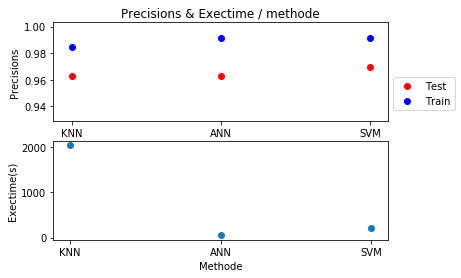

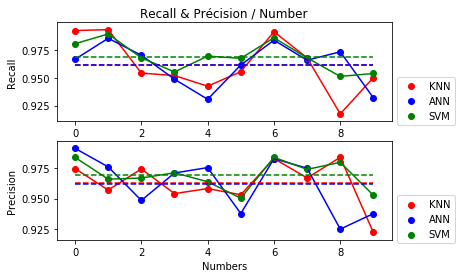

In [7]:
# Comparaison sur 30 000 données dont 70% d'entrainement

trainsize=0.7
size=30000
data=np.random.randint(70000, size=size)
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
train_size=trainsize)

scoreTest=[]
scoreTrain=[]
times=[]
Rec=[]
# KNN
start=time.time()
clfK = neighbors.KNeighborsClassifier(3,n_jobs=-1,p=3)
clfK.fit(xtrain, ytrain)
tempscore=clfK.score(xtest,ytest)
scoreTest.append(tempscore)
print("KNN : scoretest="+str(tempscore))
tempscore=clfK.score(xtrain,ytrain)
scoreTrain.append(tempscore)
print("KNN : scoretrain="+str(tempscore))
temprec=metrics.recall_score(ytest,clfK.predict(xtest),average='macro')
Rec.append(temprec)
print("KNN : Recall="+str(temprec))
length=time.time()-start
times.append(length)
print(metrics.confusion_matrix(ytest,clfK.predict(xtest)))
# ANN
start=time.time()
clfA = nn.MLPClassifier(hidden_layer_sizes=(50,)*20,solver='adam',alpha=0.3)
clfA.fit(xtrain, ytrain)
tempscore=clfA.score(xtest,ytest)
scoreTest.append(tempscore)
print("ANN : scoretest="+str(tempscore))
tempscore=clfA.score(xtrain,ytrain)
scoreTrain.append(tempscore)
print("ANN : scoretrain="+str(tempscore))
temprec=metrics.recall_score(ytest,clfA.predict(xtest),average='macro')
Rec.append(temprec)
print("ANN : Recall="+str(temprec))
length=time.time()-start
times.append(length)
print(metrics.confusion_matrix(ytest,clfA.predict(xtest)))
# SVM
start=time.time()
clfS = SVC(kernel='poly',gamma='scale',C=1)
clfS.fit(xtrain, ytrain)
tempscore=clfS.score(xtest,ytest)
scoreTest.append(tempscore)
print("SVM : scoretest="+str(tempscore))
tempscore=clfS.score(xtrain,ytrain)
scoreTrain.append(tempscore)
print("SVM : scoretrain="+str(tempscore))

temprec=metrics.recall_score(ytest,clfS.predict(xtest),average='macro')
Rec.append(temprec)
print("SVM : Recall="+str(temprec))
length=time.time()-start
times.append(length)
print(metrics.confusion_matrix(ytest,clfS.predict(xtest)))


recallK=metrics.recall_score(ytest,clfK.predict(xtest),average=None)
recallA=metrics.recall_score(ytest,clfA.predict(xtest),average=None)
recallS=metrics.recall_score(ytest,clfS.predict(xtest),average=None)

precisionK=metrics.precision_score(ytest,clfK.predict(xtest),average=None)
precisionA=metrics.precision_score(ytest,clfA.predict(xtest),average=None)
precisionS=metrics.precision_score(ytest,clfS.predict(xtest),average=None)

moyrecallK=0
moyrecallA=0
moyrecallS=0
moyprecK=0
moyprecA=0
moyprecS=0

for i in range(0,10):
    moyrecallK=moyrecallK+recallK[i]
    moyrecallA=moyrecallA+recallA[i]
    moyrecallS=moyrecallS+recallS[i]
    moyprecK=moyprecK+precisionK[i]
    moyprecA=moyprecA+precisionA[i]
    moyprecS=moyprecS+precisionS[i]
moyrecallK=moyrecallK/10
moyrecallA=moyrecallA/10
moyrecallS=moyrecallS/10
moyprecK=moyprecK/10
moyprecA=moyprecA/10
moyprecS=moyprecS/10
    
fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.scatter(('KNN','ANN','SVM'),scoreTest,c='r',label='Test')
ax1.set_title("Precisions & Exectime / methode")
ax1.set_ylabel("Precisions")
ax1.scatter(('KNN','ANN','SVM'),scoreTrain,c='b',label='Train')
ax1.legend(loc='upper left',bbox_to_anchor=(1,0.5))

ax2.scatter(('KNN','ANN','SVM'),times)
ax2.set_xlabel("Methode")
ax2.set_ylabel("Exectime(s)")

fig2, (ax3, ax4) = plt.subplots(nrows=2, ncols=1)
ax3.plot(range(0,10),recallK,c='r')
ax3.plot(range(0,10),recallA,c='b')
ax3.plot(range(0,10),recallS,c='g')
ax3.plot(range(0,10),(moyrecallK,)*10,c='r',linestyle='dashed')
ax3.plot(range(0,10),(moyrecallA,)*10,c='b',linestyle='dashed')
ax3.plot(range(0,10),(moyrecallS,)*10,c='g',linestyle='dashed')
ax3.scatter(range(0,10),recallK,c='r',label="KNN")
ax3.scatter(range(0,10),recallA,c='b',label="ANN")
ax3.scatter(range(0,10),recallS,c='g',label="SVM")
ax3.legend(loc='upper left',bbox_to_anchor=(1,0.5))
ax3.set_title("Recall & Précision / Number")
ax3.set_ylabel("Recall")

ax4.plot(range(0,10),precisionK,c='r')
ax4.plot(range(0,10),precisionA,c='b')
ax4.plot(range(0,10),precisionS,c='g')
ax4.plot(range(0,10),(moyprecK,)*10,c='r',linestyle='dashed')
ax4.plot(range(0,10),(moyprecA,)*10,c='b',linestyle='dashed')
ax4.plot(range(0,10),(moyprecS,)*10,c='g',linestyle='dashed')
ax4.scatter(range(0,10),precisionK,c='r',label="KNN")
ax4.scatter(range(0,10),precisionA,c='b',label="ANN")
ax4.scatter(range(0,10),precisionS,c='g',label="SVM")
ax4.legend(loc='upper left',bbox_to_anchor=(1,0.5))
ax4.set_xlabel("Numbers")
ax4.set_ylabel("Precision")